# Image restoration for deep-sea ROV underwater images

For best visual comparison, plot the images after each other and flip back-fourth. E.g. in Spyder IDE.

Steps:
1) Noise reduction - smoothing (usually skipped)
2) UDCP(Underwater Dark Channel Prior) - underwater color restoration
3) White balancing
4) Contrast enhancement - CLAHE on LAB (doesn't change color balance and hue)
5) Color correction - CLAHE on RGB (obs; can alter color balance and hue), or
6) Edge enhancement - Sobel/Canny
7) Sharpening - Unsharp mask

In [1]:
#%% import libraries
import os
import cv2

# custom functions
from plot_toolbox import *
from restoration_toolbox import *

In [2]:
WORKING_DIR = "C:\\Users\\torha\\div.prog\\Image-analysis\\Preprocessing\\"
IMAGE_DIR = "2019\\HD\\test-images\\"
OUTPUT_IMG_DIR = "2019\\HD\\result-images\\"

In [3]:
#%% subset of test images (2019 HD images)
helio_close_up = IMAGE_DIR + "helio_close_up.png" # natural
helio_far = IMAGE_DIR + "helio_far.png" # blueish
chimneys_columns = IMAGE_DIR + "chimneys_columns.png" # blueish
ore_close = IMAGE_DIR + "ore_close.png" # natural
ore_far = IMAGE_DIR + "ore_far.png" # blueish

fishNsand_close = IMAGE_DIR + "fishNsand_close.png" # natural-ish
red_anemones_close = IMAGE_DIR + "red_anemones_close.png" # natural-ish
rubble_close = IMAGE_DIR + "rubble_close.png" # blueish

close_to_far1 = IMAGE_DIR + "close_to_far1.png" # natural
close_to_far2_rubble = IMAGE_DIR + "close_to_far2_rubble.png" # weak blueish

sediments1 = IMAGE_DIR + "sediments1.png" # natural-ish  
sediments_mostly = IMAGE_DIR + "sediments_mostly.png" # natural-ish

Input image:  2019\HD\test-images\ore_far.png


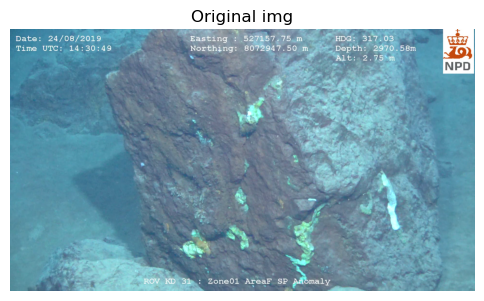

In [4]:
#%% Load image for testing
IMAGE_PATH = ore_far   #### SET NEW IMAGE HERE ###
print("Input image: ", IMAGE_PATH)

image_bgr = cv2.imread(IMAGE_PATH) # BGR by open-cv default
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plot_image(IMAGE_PATH, title="Original img")

## Image restoration steps
The following parameter settings are tailored for 2019 HD images (1920x1080p).

For 2018 SD images (704x576p) use different parameters.

In [5]:
#%% 1) Noise reduction - Bilateral filter (edge preserving)
# img_denois = apply_bilateral_filter(image_rgb, diameter=15, sigma_color=20, sigma_space=70)
# plot_image(img_denois, title="Img denoised")

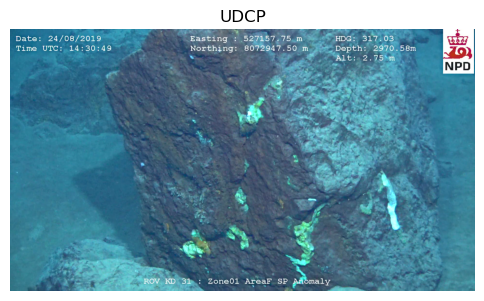

In [6]:
#%% 2) UDCP (Underwater Dark Channel Prior ))
# mitigating the effects of underwater scattering and absorption
img_udcp = UDCP(image_bgr, 
  omega=0.5, t0=0.7, r=15, eps=1e-3, radius=25)
# UDCP(image_bgr, omega=0.50, t0=0.7, r=15, eps=1e-3, radius=25) #param1, high
plot_image(img_udcp, title="UDCP")

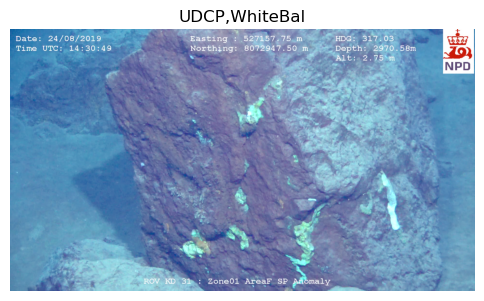

In [7]:
#%% 3) White balancing
img_udcp_wb = white_balance_blend(image_bgr, gamma=0.65, blend_factor=0.7)
# (img_udcp, gamma=0.85, blend_factor=0.5) #param1, high
plot_image(img_udcp_wb, title="UDCP,WhiteBal")

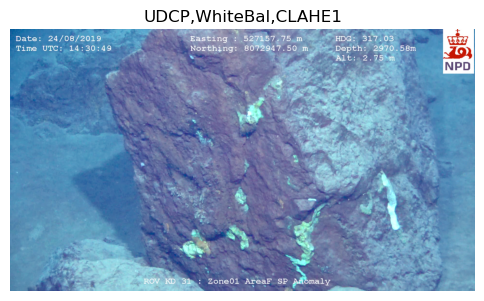

In [8]:
#%% 4) Contrast enhancement - CLAHE on LAB 
# (doesn't change color balance and hue)
img_udcp_wb_clahe1 = preprocess_clahe(img_udcp_wb, 
    clipLimit=0.2, tileGridSize=(8,8))
plot_image(img_udcp_wb_clahe1, title="UDCP,WhiteBal,CLAHE1")

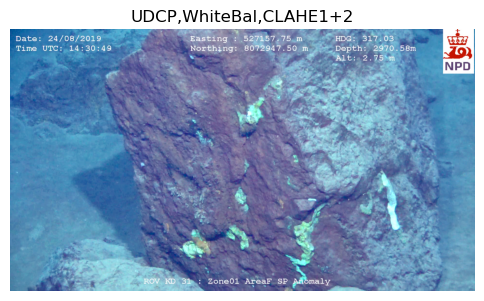

In [9]:
#%% 5) Color correction - CLAHE on RGB 
# (obs; can alter color balance and hue)
img_udcp_wb_clahe1_clahe2 = color_balance_and_saturation_enhancement(
    img_udcp_wb_clahe1,saturation_factor=1.1, clip_limit=0.2, tile_grid_size=(8,8))
plot_image(img_udcp_wb_clahe1_clahe2, title="UDCP,WhiteBal,CLAHE1+2")

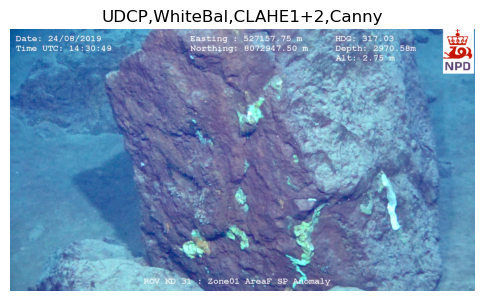

In [10]:
#%% 6) Edge Enhancement - subtle Canny
img_udcp_wb_clahe1_clahe2_canny = image_unsharp = edge_enhancement_canny(
    img_udcp_wb_clahe1_clahe2, edge_intensity=0.05)
plot_image(img_udcp_wb_clahe1_clahe2_canny, title="UDCP,WhiteBal,CLAHE1+2,Canny")

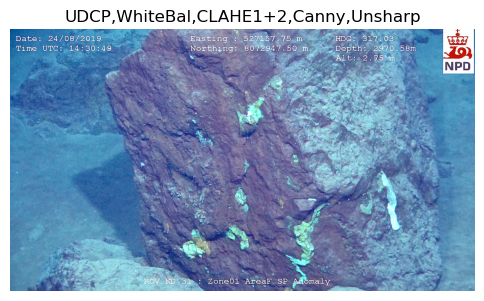

In [11]:
#%% 7) Sharpen - Unsharp Mask Sharpening
img_udcp_wb_clahe1_clahe2_canny_unsharp = unsharp_mask(
    img_udcp_wb_clahe1_clahe2_canny,
    sigma=1.0, strength=3.0)
plot_image(img_udcp_wb_clahe1_clahe2_canny_unsharp, title="UDCP,WhiteBal,CLAHE1+2,Canny,Unsharp")

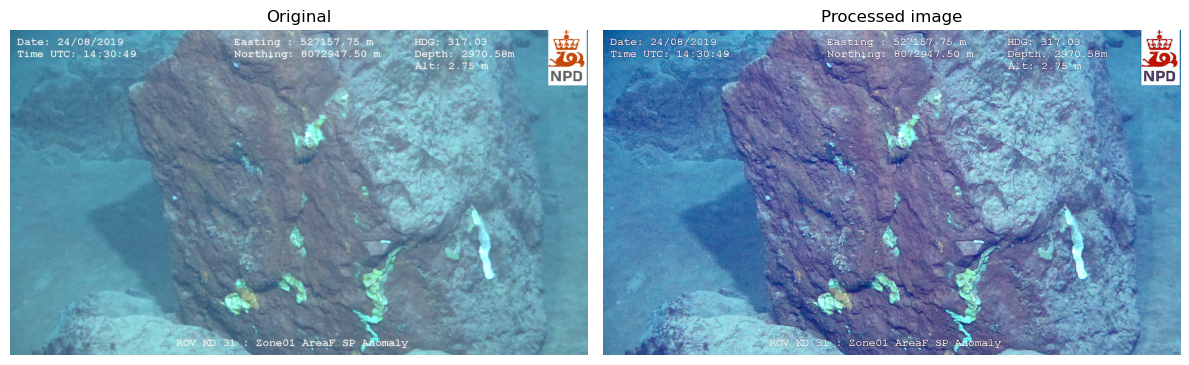

In [15]:
processed_rgb = cv2.cvtColor(img_udcp_wb_clahe1_clahe2_canny_unsharp, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_rgb)
ax[0].set_title("Original"); ax[0].axis('off')

ax[1].imshow(processed_rgb)
ax[1].set_title("Processed image"); ax[1].axis('off')
plt.tight_layout(); plt.show()

In [18]:
#%% WRITE IMAGE TO DISK
save_image(image=processed_rgb, 
            file_path=OUTPUT_IMG_DIR + "output_processed.png")

## Folder processing

In [19]:
preprocess_folder(input_folder=IMAGE_DIR, output_folder=OUTPUT_IMG_DIR)

FINISHED PROCESSING OF FOLDER: 2019\HD\test-images\
